### Demonstration of an evaluation based on the MCTSAgent

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import chess
import chess.variant
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../../../')
from DeepCrazyhouse.src.runtime.color_logger import enable_color_logging
from DeepCrazyhouse.src.domain.agent.neural_net_api import NeuralNetAPI
from DeepCrazyhouse.src.domain.agent.player.mcts_agent import MCTSAgent
from DeepCrazyhouse.src.domain.agent.player.raw_net_agent import RawNetAgent
from DeepCrazyhouse.src.domain.crazyhouse.game_state import GameState
from DeepCrazyhouse.src.runtime.color_logger import enable_color_logging
from time import time
%matplotlib inline
plt.style.use('seaborn-whitegrid')
enable_color_logging()

/home/queensgambit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2019-05-22 14:47:14 matplotlib.pyplot[4863] DEBUG Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [4]:
batch_size = 8 #16 #1 #8

In [5]:
nets = []
for idx in range(1):
    nets.append(NeuralNetAPI(ctx='cpu', batch_size=batch_size))

self.symbol_path: /home/queensgambit/Programming/Deep_Learning/models/risev2/symbol/model-1.19246-0.603-symbol.json
self.params_path: /home/queensgambit/Programming/Deep_Learning/models/risev2/params/model-1.19246-0.603-0223.params


In [6]:
raw_agent = RawNetAgent(nets[0])

In [7]:
mcts_agent = MCTSAgent(nets, threads=16, playouts_empty_pockets=4096*5, playouts_filled_pockets=4096*5, # 4096*5
                 cpuct=2.5, dirichlet_epsilon=.25, dirichlet_alpha=0.2, batch_size=batch_size, q_value_weight=0.7,
                 max_search_depth=40, temperature=0., virtual_loss=3, verbose=True,
                 min_movetime=10000, check_mate_in_one=False, use_oscillating_cpuct=False, use_pruning=False)

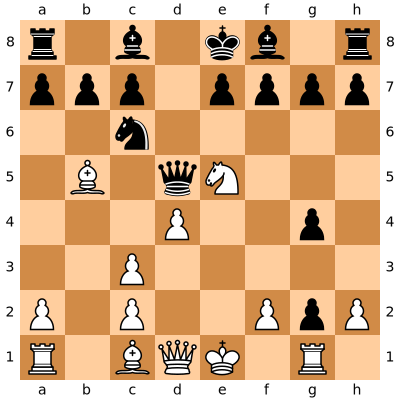

In [8]:
board = chess.variant.CrazyhouseBoard()

#board.push_uci('e2e4')
#board.push_uci('e7e6')

fen = 'rnbqkb1r/ppp1pppp/5n2/3P4/8/8/PPPP1PPP/RNBQKBNR/P w KQkq - 1 3'
fen = 'rnb2rk1/p3bppp/2p5/3p2P1/4n3/8/PPPPBPPP/RNB1K1NR/QPPq w KQ - 0 11'
#fen = 'r1b1kbnr/ppp1pppp/2n5/3q4/3P4/8/PPP1NPPP/RNBQKB1R/Pp b KQkq - 1 4'
#fen = 'r1b1k2r/ppp2ppp/2n5/3np3/3P4/2PBP3/PpPB1PPP/1Q2K1NR/QNrb b Kkq - 27 14'
#fen = 'r1bb4/ppp2pkp/5npb/4p3/4P3/2N5/PPP1BPPP/3RK2R/QNRqpnp w K - 3 16'
#fen = '3R1b2/1bP1kp2/3Npn1p/3p4/5p2/5N1b/PPP2P1P/5Q1K/RPRPRQPnpbp b - - 4 36'
#fen = 'r3k1nr/ppp2ppp/2n5/8/q7/Pp6/1PnRN1PP/1K3B1R/BBQBppppp b kq - 3 27'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1/Qrbbpbb b - - 0 27'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1/Qrbbpbb b - - 0 30'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/5P2/3P1p2/PP3RPP/RN4K1/QQprbbpbb b - - 1 30'

# Test positions
#fen = '3R1b2/1bP1kp2/3Npn1p/3p4/5p2/5N1b/PPP1QP1P/3R1RK1/QPpprnpbp b - - 0 29'
fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1[Qrbbpbb] b - - 3 30'
#fen = 'q6r/p2P1pkp/1p1b1n2/2p2B2/8/6n1/PPP2KPp/R4R2/PNNRPBPbqpp w - - 2 26'
#fen ='2kr1b2/1bp2p1p/p3pP1p/1p5Q/5B2/3B1p2/PPP2PrP/R4R1K/QNpnnnp w - - 0 18'
#fen = 'q6r/p2P1pkp/1p1b1n2/2p2B2/8/6n1/PPP2KPp/R4R2/PNNRPBPbqpp w - - 50 26'
#fen = 'r4r1k/ppp1q1bp/4Ppp1/1P6/2NN3P/2BPPb2/P2PNPpR/R3K3/PBQn b Q - 2 34'
#fen = 'r1bq1b1r/ppp1kPpp/4Pn2/n2Pp3/2B4n/3P4/PPP2PPP/RNBQK2R/ w KQ - 0 10'

#fen = 'r4rk1/ppp2pbp/1nnp4/6P1/4Pp2/1P1P1N1P/2P2PPK/R2Q1R2/QNbbpb w - - 0 23'
#fen = 'r4rk1/ppp2pPp/1nn3nP/4b3/5p1B/1P1P3P/2P2PPK/R2Q1R2/Qbpnpb w - - 2 37'
#fen = 'r4rk1/ppp2pPp/1nn2bnP/4b3/6Q1/1P1P1pBP/2P2PPK/R4R2/Qpnpb w - - 2 39'
#fen = 'B2q1r1k/p3pp2/6pb/3pB2p/3N4/B2NP1pn/P1PP2P1/R2Q3K/PPrnprp b - - 0 28'
#fen = 'r1bq3r/p1ppbkpp/2p2n2/8/4P3/8/PPP2PPP/RNBQK2R/NPPnbp w KQ - 2 8'
#fen = 'r1bqk2r/1pp1nppp/1p3p2/3p4/3P3n/1B6/PP2BPPP/RNBQ1KNR/Pp b kq - 0 14'
#fen = '3qk2r/1pp1nppp/1p3p2/3p4/3P3n/1B5P/RP2BPpP/1NBQ2KR/RBPPn b k - 2 18'
#fen = 'r2q2kb/ppp4p/1nn1P1p1/4p1N1/2Pb4/1P1P2NP/2PB1rP1/Q4RK1/RPppb w - - 0 27'
#fen = 'r1bqk1r1/ppppbppp/5n2/4nN2/2B1P3/2N5/PPP2PPP/R1BQK2R/Pp w KQq - 2 8'
#fen = 'r2q1rk1/pP2ppbp/2p3pb/2Q5/4Pp2/2NB1NpP/PPP3P1/R4RK1/NBpn b - - 0 19'
#fen = 'r1bqkb1r/ppp1pppp/2n2n2/3p4/3P4/2N2N2/PPP1PPPP/R1BQKB1R/ w KQkq - 6 4'
#fen = 'r1bq1b2/2p1pk2/p1p2npp/8/3P4/P4N2/1PP2PPP/R1B1K2R/RPNPbnqp w KQ - 26 0'
#fen = 'r5k1/ppp2Rp1/1bnp1qP1/2b1pP2/8/3P1N1p/PPP2PPP/R2Q1R1K/Nbbn w - - 42 0'
#fen = 'r2q3r/ppp1k1pp/2npN3/2b1p3/4P1n1/2NP4/PPP2PPP/R1B2RK1/BPqb w - - 0 11'
#fen = 'r2qk1r1/ppp2p2/2np3p/2bBp1p1/4P1bn/3P1NB1/PPP2PPP/R2Q1RK1/N w q - 0 12'
#fen = 'r2k3r/pppb2pp/5b2/6N1/4P2n/3Q4/PPP2PPP/R1B1K2R/PPNPqbnp w KQ - 0 14'
#fen = 'r1bqk2r/ppp1bppp/5n2/3p4/2BQP3/2N5/PPP2PPP/R1B1K2R/NPnp w KQkq - 0 8'
#fen = '3r1rk1/p1p1npp1/2pp3p/2b1p1NQ/4P3/3P1P2/PPP2P1P/R2Q1RK1/BBnbn w - - 2 18'
#fen = 'r2q1rk1/p1p1bpp1/2pp1n1p/2b1pN2/4P1nB/3P1N2/PPP2PPP/R2Q1RK1/B w - - 0 13'
#fen = 'r1bq1rk1/ppp2pp1/2np1n1p/2b1p1B1/2B1P3/2NP1N2/PPP2PPP/R2Q1RK1/ w - - 14 8'
#fen = 'r1bqk1r1/pppp1ppp/2n2n2/5N2/1bB1P3/2N4p/PPP2PPP/R1BQK1R1/P w Qq - 2 9'
#fen = 'r1bqk1r1/ppp2ppp/2n2n2/3p1N2/1bB1P3/2N4P/PPP2P1P/R1BQK1R1/PP w Qq - 0 10'
#fen = 'r1bqk2r/ppppbppp/2n2n2/8/2BNP3/8/PPP2PPP/RNBQK2R/Pp w KQkq - 1 6'
#fen = 'r1b1k1r1/pp1p1ppp/1q1B1nn1/1B3N2/4P3/2P1p3/P1P1QPpP/R3K1R1/BPPn w Qq - 34 18'
#fen = 'r1bqk3/ppp1bprp/3p1n2/5PP1/4P2n/2NQ4/PPP2PBP/R1B1K2R/Npp w KQq - 1 13'
#fen = 'r1bqk1nr/pppp1ppp/5b2/4nNP1/2B1P3/7p/PPP2PPP/RNBQK2R/ w KQkq - 1 8'
#fen = 'r1b1k1nr/ppp2ppp/5q2/3pnN2/4P3/7p/PPP2PPP/RNBQKB1R/Bp w KQkq - 1 10'
#fen = 'r3k2r/ppp2ppp/5n2/3pnb2/4P3/7p/PPP2PPP/RNBQKB1R/Qbnp w KQkq - 22 12'
#fen = 'rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR/ w KQkq - 2 2'
#fen = 'r1bq1rk1/ppp2ppp/2np4/2bBp3/4P1n1/3P1N2/PPP1QPPP/R1B2RK1/N w - - 2 10'
#fen = 'r1bq1rk1/pppp1ppp/2n2n2/2b1p3/2B1P3/2NP1N2/PPP2PPP/R1BQ1RK1/ w - - 12 7'
#fen = 'r1bq1rk1/pppp1ppp/2n5/2bBp3/4P1n1/3P1N2/PPP2PPP/R1BQ1RK1/N w - - 2 9'
#fen = 'r1bqk1r1/ppppbppp/5n2/1B2nN2/4P3/2N4p/PPP2PPP/R1BQK2R/P w KQq - 16 9'
#fen = 'r1bqkb1r/ppp2ppp/3p4/6P1/4n3/2N5/PPP2P1P/R1BQK1Rb/NPNpp w Qkq - 2 13'

#fen = 'r1b1kb1r/p1p1pppp/2N5/1B2N3/2pPn3/2PKB3/P1PP2p1/3q1rR1/QPPNP w - - 0 25' # mate threat
#fen = 'r1b1kb1r/p1p1pppp/2N5/4N3/2BPn3/2PKB3/P1PP2p1/3q1rR1/PQPPNP b - - 0 25'
#fen = 'r1b1kb1r/p1p1pppp/2N5/1B6/2NPn3/2PKB3/P1PP2p1/3q1rR1/PQPPNP b - - 1 25'
fen = '3rkb1r/2pb1pp1/q2Pp3/3pP2p/3P4/2PPnP2/P1P1N1PP/R2R2K1/NNQbb b k - 0 21' # mate threat
#fen = '3rkb1r/2pb1pp1/q2PpN2/3pP2p/3P4/2PP1P2/P1P1N1PP/R2n2K1/NQrbb b k - 0 22'
#fen = '3rkb1r/2pb1p2/q2Ppp2/3pP2p/3P4/2PP1P2/P1P1N1PP/R2n2K1/NQnrbb w k - 0 23'

# previous stalled connection fen
#fen = 'r1bk3r/ppppbpQp/4p3/8/4n3/4P2N/PPPP2PP/R1Bq1BKR/PNNp b - - 2 13'
#fen = 'r1bqkbnr/ppp2ppp/3p4/8/3QP3/2N4p/PPP2PPP/R1B1KB1R/PNn w KQkq - 1 7'
#fen = 'r1bq1rk1/ppp2pp1/2np1n1p/2b1p1B1/2B1P3/2NP1N2/PPP2PPP/R2Q1RK1/ w - - 14 8'
#fen = 'rnb1kb1r/ppp1pppp/5n2/q7/8/2N2N2/PPPP1PPP/R1BQKB1R/Pp w KQkq - 0 5'
#fen = 'rnb2b1r/ppp1pkpp/5n2/2q5/3N2p1/2N5/PPPP1PPP/R1BQK2R/PPb w KQ - 0 8'
#fen = 'r1b1kr2/ppp3pp/3bPq2/1N1Ppn1n/2B4n/3PPP2/PPP2QPP/R1B2RK1/ b - - 9 15'
#fen = 'r1bk4/p1p1qP1p/2pn1p2/5pB1/2B1P3/8/PPPQ1PnP/R1B1rK2/RNPPPn w - - 0 23'
#fen = 'r1b1k2r/p1p1qppp/2p4P/5p2/2B1n3/5p2/PPP1QPPP/R1B1K2R[BNPnn] w KQkq - 0 12'
#fen = 'r1bbk2r/pp4pp/3Q4/1N2N3/7n/8/PPP2PpP/R1B3K1[PPPqrbnppp] w - - 1 20'
#fen = 'r4k1r/p3b1qp/2Nppn2/3p4/2P5/2KpPP1P/PP1BpPBP/q1n5/RBNPr b - - 1 34'
#fen = 'r4k1r/pp2Pppp/2bN4/4p1q1/4P1pB/3PPPP1/PPB4K/RN4n1/BRPnq b - - 0 36'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P1b1/PPPPQPP1/R1B1K2R[Pbnnp] b KQ - 0 22'
#fen = '5b1k/prp1p1p1/2n3n1/8/8/2P1BN2/P1PP1P1P/R1BQK3/QPRrnpbpppp w Q - 0 27'
#fen = '5bk1/prp1p1pR/2n3n1/8/8/2P1BN2/P1PP1P1P/R1BQK3/QPrnpbpppp w Q - 0 28'
#fen = '5b1k/prp1p1p1/2n3n1/7Q/8/2P1BN2/P1PP1P1P/R1BQK3/PRrnpbpppp b Q - 0 27'
#fen = 'r1b1k2r/pppbnppp/4p3/3pP3/3Pb3/5Q2/PPP2P1P/RN4KR/BPNQn w kq - 0 17'
#fen = 'r1b1k1qQ~/pppbnp1p/4pp2/3pP3/3P4/5b2/PPP2P1P/RN4KR/RBQnn w q - 0 20'
#fen = 'r1b1knn1/pppb1pQp/4pp2/3pP3/3P4/5b2/PPP1nP1P/RN3K1R/QRBp w q - 0 23'
#fen = 'r1b1k2r/pppbnppp/4p3/3pP3/3P4/5Q2/PPP2P1P/RN4KR/BPNQbn b kq - 0 16'
#fen = 'r1b1k2r/ppp1nppp/4p3/1b1pP3/3P4/2N2Q2/PPP2P1P/R5KR/BPNQbn b kq - 0 17'
#fen = 'r1b1k2r/ppp1qppp/2n1p3/2BpPn2/3P4/3B1N2/PPP2PPP/RN1QK2R/b b KQkq - 0 8'
#fen = 'r1b1k2r/ppp1qppp/4p3/2Bpnn2/3P4/3B1N2/PPP2PPP/RN1QK2R/pb w KQkq - 0 9'
#fen = 'r1b1k2r/ppp1qppp/4p3/2BpNn2/3P4/3B4/PPP2PPP/RN1QK2R/Npb b KQkq - 0 9'
#fen = 'r1b1k2r/ppp2ppp/4pq2/2BpNn2/3P4/3B4/PPP2PPP/RN1QK2R/Npb w KQkq - 0 10'
#fen = 'rnbqkb1r/ppp1pppp/8/3n4/8/2N5/PPPP1PPP/R1BQKBNR[Pp] w KQkq - 0 4'
#fen  = 'r1bqkb1r/ppp1pppp/2n5/1B6/3P4/2P2N2/P1P2PpP/R1BQK1R1[NPnp] b Qkq - 0 8'
fen = 'r1b1kb1r/ppp1pppp/2n5/1B1qN3/3P2p1/2P5/P1P2PpP/R1BQK1R1/NPn w Qkq - 0 10' # N@a6 missed in prior
#fen = 'r1b1k2r/pp3qp1/2n1pn1p/4p3/3P4/2PP1N2/PP2QPPP/R1B1K2R/Bppbn w KQkq - 0 15'

board.set_fen(fen)
#board = board.mirror()

state = GameState(board)
board

In [9]:
chess.COLOR_NAMES

['black', 'white']

In [10]:
board.turn

True

In [11]:
len(list(state.get_legal_moves()))

104

In [12]:
def plot_moves_with_prob(moves, probs, only_top_x=None):
    
    # revert the ordering afterwards
    idx_order = np.argsort(probs)[::-1]
    
    if only_top_x is not None and only_top_x < len(idx_order):
        idx_order = idx_order[:only_top_x]
    
    #moves_ordered = moves[range(len(moves))] #idx_order[::-1]]
    probs_ordered = [] #probs[idx_order]
    
    moves_ordered = []
    for idx in idx_order:
        probs_ordered.append(probs[idx])
        moves_ordered.append(moves[idx])
        
    plt.barh(range(len(probs_ordered)), probs_ordered)
    plt.yticks(range(len(moves_ordered)), moves_ordered)


### Evalution using the raw network

In [13]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = raw_agent.evaluate_board_state(state)
print('Elapsed time: %.4fs' % (time()-t_s))

Elapsed time: 0.0615s


In [14]:
pred_value

array([0.19145463], dtype=float32)

2019-05-22 14:47:16 matplotlib.axes._base[4863] DEBUG update_title_pos
2019-05-22 14:47:16 matplotlib.axes._base[4863] DEBUG update_title_pos
2019-05-22 14:47:16 matplotlib.axes._base[4863] DEBUG update_title_pos
2019-05-22 14:47:16 matplotlib.axes._base[4863] DEBUG update_title_pos
2019-05-22 14:47:16 matplotlib.axes._base[4863] DEBUG update_title_pos


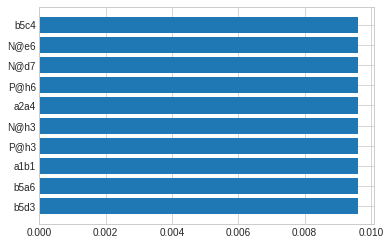

In [16]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

### Evalution using the MCTS-Agent

In [ ]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = mcts_agent.evaluate_board_state(state)
print('Elapsed time: %.4fs' % (time()-t_s))

start inference thread...
self.thread_inference.isAlive() True
2019-05-22 14:48:57 root[4863] DEBUG Starting a brand new search tree...


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/queensgambit/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/queensgambit/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "../../../DeepCrazyhouse/src/domain/agent/player/util/net_pred_service.py", line 98, in _provide_inference
    self.batch_policy_results[channel_idx] = policy_preds[i]
ValueError: could not broadcast input array from shape (5184) into shape (2272)



In [28]:
mcts_agent.root_node.legal_moves[mcts_agent.root_node.child_number_visits.argmax()]

Move.from_uci('e3d1')

In [29]:
mcts_agent.root_node.legal_moves[mcts_agent.root_node.q_value.argmax()]

Move.from_uci('a6d6')

In [19]:
pb_c_base = 19652 / 10
pb_c_init = 3.6
import math
cpuct = math.log((3000 + pb_c_base + 1) / pb_c_base) + pb_c_init

In [20]:
cpuct

4.527060938824912

In [21]:
#c = (a * b ) + (0.3 * a + 0.7 * b)

In [22]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos


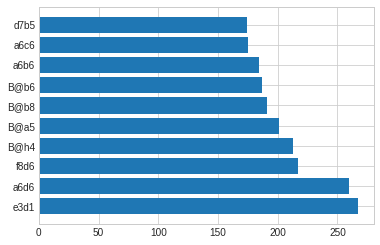

In [23]:
plot_moves_with_prob(legal_moves, mcts_agent.root_node.child_number_visits, only_top_x=10)

2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos


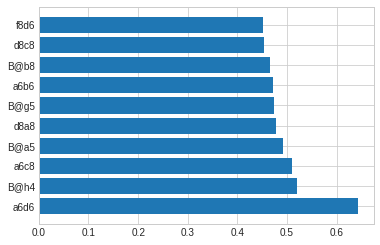

In [24]:
plot_moves_with_prob(legal_moves, mcts_agent.root_node.q_value, only_top_x=10)

2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos


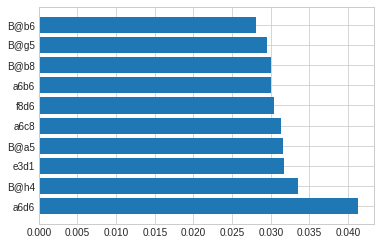

In [25]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos
2019-04-25 18:16:02 matplotlib.axes._base[19301] DEBUG update_title_pos


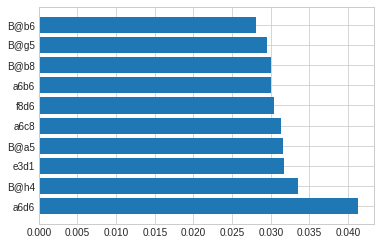

In [26]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

In [27]:


%load_ext line_profiler
r = %lprun -r -f mcts_agent._run_single_playout mcts_agent._run_single_playout(state, mcts_agent.root_node)
r.print_stats()



ModuleNotFoundError: No module named 'line_profiler'

In [ ]:
from DeepCrazyhouse.src.domain.crazyhouse.input_representation import board_to_planes


In [ ]:
%load_ext line_profiler
r = %lprun -r -f board_to_planes board_to_planes(board)
r.print_stats()

In [ ]:
%load_ext line_profiler
r = %lprun -r -f board_to_planes board_to_planes(board)
r.print_stats()